In [ ]:
#!pip install spacy
#!pip install wordcloud
#!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import string
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#load the data set
elon=pd.read_csv("/content/sample_data/Elon_musk.csv", encoding='cp1252',index_col=0)
elon.head()

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
elon=[x.strip() for x in elon.Text]
elon=[x for x in elon if x]
elon[0:10]
#elon.strip()

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
#joining as a whole text
text=' '.join(elon)
text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [ ]:
#remove the tweter handle name
tknzr=TweetTokenizer(strip_handles=True)
tweet_tkn=tknzr.tokenize(text)
print(tweet_tkn)

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be'

In [ ]:
#join the tweet removed token
tweet_join=' '.join(tweet_tkn)
print(tweet_join)

I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the

In [ ]:
#remove puncation
no_punc_text=tweet_join.translate(tweet_join.maketrans('','',string.punctuation))
no_punc_text
#tokenization

#text_token=word_tokenize(no_punc_text)
#print(text_token)

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway tog

In [ ]:
#removal of URL from the text
import re
no_url=re.sub(r'http\S+', '', no_punc_text)
no_url

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well

In [ ]:
#tokenization
text_token=word_tokenize(no_url)
print(text_token)

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing', 'Plea

In [ ]:
#stopwords
nltk.download('stopwords')
stop_txt=pd.read_fwf("/content/sample_data/stop.txt")
stop_txt.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,a
0,a's
1,able
2,about
3,above
4,according


In [ ]:
sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','’']
my_stop_word=stopwords.words('english')
my_stop_word.extend(sw_list)
my_stop_word.extend(stop_txt.a)
len(my_stop_word)
print(my_stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#remove stop words: word for word in text_tokens if not word in my_stop_word
no_stop_words=[words for words in text_token if not words in my_stop_word]
no_stop_words[0:20]

['alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'Great',
 'interview',
 'Doge',
 'underestimated',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'year',
 'Now',
 'Happy',
 'New']

In [ ]:
#Normalise the data : making all data into lowercase
lower_words=[x.lower() for x in no_stop_words]
lower_words[0:20]

['alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'now',
 'happy',
 'new']

In [ ]:
#stemming
#in stemming so many words will not come to actual root version
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_token=[ps.stem(words) for words in lower_words]
stemmed_token[0:20]

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'great',
 'interview',
 'doge',
 'underestim',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'year',
 'now',
 'happi',
 'new']

In [ ]:
#lematization
!python -m spacy download en_core_web_sm

2023-06-03 07:20:59.331813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(no_stop_words))
doc[0:10]

alien Ray tracing Cyberpunk HDR nextlevel Have Great interview Doge

In [ ]:
lemma=[token.lemma_ for token in doc]
lemma[0:10]

['alien',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'great',
 'interview',
 'Doge']

In [ ]:
#join the lemmas
extract_tweet=' '.join(lemma)
extract_tweet

'alien Ray trace Cyberpunk HDR nextlevel have great interview Doge underestimate Congratulations Tesla China amazing execution year now Happy New Year Ox Frodo underdoge all think fail himself Haha Indeed Tweets represent realworld time allocation the entertaining outcome just just agree Clubhouse it real buy Dogecoin lil x toddler hodler he issue sentence bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck RT NASA select Falcon Heavy launch element lunar gateway mission once predict cash flow Starlink IPO Starlink staggeringly difficult technical economic endeavor however … SpaceX pass deep chasm negative cash flow year … low cost ton carbon sequester net product make must scalable … it mean price country only difference taxis ship this intend Earth idea apply Mars XPrize team manage 100 M carbon capture prize everyone Tesla receive stock my comp stock option table that miss back work … do bite high Doge appear inflation

Feature extraction

In [ ]:
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(lemma)

In [ ]:
print(vectorizer.vocabulary_)

{'alien': 193, 'ray': 2326, 'trace': 2984, 'cyberpunk': 754, 'hdr': 1336, 'nextlevel': 1936, 'have': 1331, 'great': 1284, 'interview': 1529, 'doge': 876, 'underestimate': 3148, 'congratulations': 662, 'tesla': 2893, 'china': 570, 'amazing': 213, 'execution': 1035, 'year': 3356, 'now': 1964, 'happy': 1319, 'new': 1933, 'ox': 2060, 'frodo': 1187, 'underdoge': 3147, 'all': 196, 'think': 2923, 'fail': 1069, 'himself': 1377, 'haha': 1308, 'indeed': 1471, 'tweets': 3032, 'represent': 2390, 'realworld': 2340, 'time': 2945, 'allocation': 198, 'the': 2909, 'entertaining': 984, 'outcome': 2040, 'just': 1572, 'agree': 177, 'clubhouse': 599, 'it': 1549, 'real': 2336, 'buy': 489, 'dogecoin': 878, 'lil': 1671, 'toddler': 2956, 'hodler': 1383, 'he': 1337, 'issue': 1548, 'sentence': 2537, 'bit': 406, 'high': 1370, 'thank': 2904, 'fix': 1133, 'please': 2155, 'unlock': 3170, 'account': 136, 'this': 2925, 'true': 3010, 'power': 2191, 'any': 236, 'crypto': 738, 'wallet': 3253, 'give': 1257, 'private': 222

In [ ]:
vect_DF=pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=['frequency']).T
vect_DF

,frequency
alien,193
ray,2326
trace,2984
cyberpunk,754
hdr,1336
...,...
click,592
samwise,2480
gamgee,1219
altho,206


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(10)

,0
ðogecoin,3373
zone,3372
zon,3371
zip,3370
zero,3369
zenit,3368
zealand,3367
yup,3366
your,3365
young,3364


In [ ]:
print(vectorizer.get_feature_names_out()[100:200])

['74' '78' '7th' '90' '9007' '922' '948' '95' '99' 'aber' 'abo' 'aboard'
 'abort' 'about' 'above' 'absence' 'absolute' 'absolutely' 'absorb'
 'absorption' 'absurd' 'absurdly' 'ac' 'academia' 'accel' 'accelera'
 'accelerate' 'acceleration' 'accelerator' 'accept' 'acceptable' 'access'
 'accessible' 'accident' 'accidental' 'accommodate' 'account' 'accura'
 'accuracy' 'accurate' 'ace' 'achieve' 'achievement' 'achy' 'acquisition'
 'action' 'active' 'activity' 'actual' 'actuall' 'actually' 'actuary'
 'adagio' 'add' 'additive' 'address' 'administer' 'adult' 'advanc'
 'advance' 'advanced' 'advantage' 'adventure' 'advertising' 'advice'
 'advise' 'aero' 'afb' 'affair' 'affect' 'affordable' 'africa' 'after'
 'afternoon' 'age' 'ago' 'agony' 'agree' 'agreed' 'ah' 'ahead' 'ahem' 'ai'
 'aim' 'air' 'aircraft' 'airplane' 'ak' 'aka' 'alert' 'alexander' 'algo'
 'algorithm' 'alien' 'aliens' 'align' 'all' 'allocati' 'allocation'
 'allow']


Bigram and Trigram analysis

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=200)
matrix_ngram=cv_ngram_range.fit_transform(lemma)

In [ ]:
cv_ngram_range.get_feature_names_out()

array(['20', 'absolutely', 'accurate', 'add', 'ai', 'all', 'also',
       'amazing', 'and', 'appreciate', 'astronaut', 'autopilot', 'back',
       'bad', 'bar', 'battery', 'be', 'berlin', 'beta', 'big', 'boca',
       'body', 'booster', 'build', 'but', 'call', 'car', 'cargo', 'close',
       'come', 'company', 'complete', 'confirm', 'cool', 'cost', 'crew',
       'day', 'design', 'difference', 'doge', 'dojo', 'dragon', 'drive',
       'droneship', 'early', 'earth', 'easy', 'electric', 'energy',
       'engine', 'engineering', 'exactly', 'fair', 'falcon', 'fast',
       'feel', 'fire', 'fix', 'flap', 'flight', 'fly', 'for', 'fsd',
       'full', 'fun', 'future', 'game', 'giga', 'give', 'good', 'great',
       'haha', 'happen', 'hard', 'have', 'he', 'hear', 'high', 'hope',
       'human', 'if', 'important', 'improve', 'improvement', 'in',
       'increase', 'it', 'just', 'land', 'landing', 'launch', 'leg',
       'life', 'long', 'lot', 'love', 'low', 'make', 'mars', 'mass',
       'matte

TF-IDF vetorizer

In [ ]:
tfidf_ngram_max_feature=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidf_ngram_max_feature.fit_transform(lemma)

In [ ]:
print(tfidf_ngram_max_feature.get_feature_names_out())
print(tfidf_matrix_ngram.toarray())

['10' '100' '13' '15' '20' '2020' '25' '30' '300' '40' '4d' '60' '90'
 'absolutely' 'access' 'accurate' 'actually' 'add' 'after' 'ago' 'agree'
 'ahead' 'ai' 'aim' 'air' 'all' 'also' 'amazing' 'analysis' 'and' 'apply'
 'appreciate' 'approval' 'arm' 'art' 'article' 'as' 'astronaut' 'at'
 'austin' 'automatically' 'autopilot' 'awesome' 'back' 'bad' 'bar' 'base'
 'battery' 'be' 'berlin' 'beta' 'big' 'bit' 'boca' 'body' 'booster'
 'brain' 'bs' 'build' 'burn' 'but' 'buy' 'cake' 'call' 'camera' 'can'
 'car' 'cargo' 'catch' 'cell' 'ch4' 'challenge' 'chamber' 'chance'
 'change' 'check' 'china' 'chip' 'civilization' 'close' 'cold' 'color'
 'come' 'comment' 'communication' 'company' 'complete' 'computer'
 'confirm' 'congratulations' 'continue' 'control' 'cool' 'cost' 'course'
 'cov' 'covid' 'crazy' 'create' 'crew' 'critical' 'curevac' 'cyberpunk'
 'cybertruck' 'cycle' 'datum' 'day' 'deep' 'definitely' 'delivery'
 'depend' 'deployment' 'design' 'detail' 'develop' 'die' 'difference'
 'direction' 'do

word cloud generation

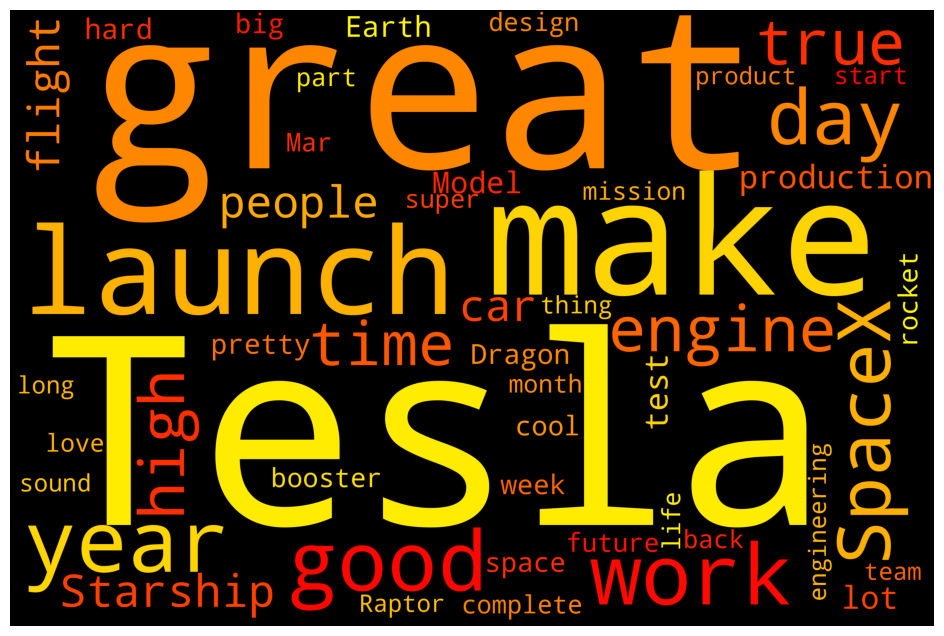

In [ ]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(20,8))
  plt.imshow(wordcloud)
  plt.axis('off')

my_stop_word.extend('pron')
my_stop_word.extend('rt')
my_stop_word.extend('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,colormap='autumn',stopwords=my_stop_word).generate(extract_tweet)
plot_cloud(wordcloud)

Name Entity Recognation

In [ ]:
nlp=spacy.load('en_core_web_sm')

one_block=extract_tweet
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [ ]:
for token in doc_block[100:200]:
  print(token,token.pos_)

deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
year NOUN
… PUNCT
low ADJ
cost NOUN
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
product NOUN
make VERB
must AUX
scalable VERB
… PUNCT
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
Earth PROPN
idea NOUN
apply VERB
Mars PROPN
XPrize PROPN
team NOUN
manage VERB
100 NUM
M PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
Tesla PROPN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
table NOUN
that PRON
miss VERB
back ADP
work NOUN
… PUNCT
do AUX
bite VERB
high ADJ
Doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin PROPN
unit NOUN
time NOUN
… PUNCT
wow INTJ
1 NUM
orbital ADJ
launch NOUN
tower NOUN
stack NOUN
2 NUM
enough ADJ
Raptors NOUN
orbit VERB
booster NOUN
3 NUM
improve VERB
ship NOUN
booster NOUN
mass NOUN
Back PROPN
work NOUN
tonight NOUN
Ð PROPN
Ðogecoin PROPN
Instructional PROPN
video NOUN
the DET
people NOUN
speak VERB
… PUNCT

In [ ]:
#filtering noun and verb
noun_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(noun_verb[100:200])

['cost', 'people', 'rain', 'pain', 'u0001f3b6', 'Doge', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'note', 'email', 'text', 'Lessons', 'learn', 'story', 'read', 'hear', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'scratch', 'ship', 'land', 'burn', 'solution', 'greate', 'gas', 'maneuvering', 'thruster', 'turbopumpfe', 'launch', 'SPHEREx', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'meme', 'happen', 'masterpiece', 'dumb', 'time', 'pull', 'method', 'people', 'crypto', 'ur', 'outcome', 'sea', 'wind', 'launch', 'satellite', 'fill', 'art', 'u0434', 'u0435', 'u043b', 'progress', 'work', 'ensure', 'safety', 'communication', 'mission', 'enable', 'access', 'people', 'dream', 'space', 'announce', 'astronaut', 'mission', 'work']


In [ ]:
#counting the noun_verb token
cv=CountVectorizer()
X=cv.fit_transform(noun_verb)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
#cv.vocabulary_.items()
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,make,63
1,launch,55
2,year,48
3,work,46
4,time,36
5,engine,36
6,day,36
7,test,33
8,people,32
9,car,29


<Axes: title={'center': 'Top 30 noun and verb'}, xlabel='word'>

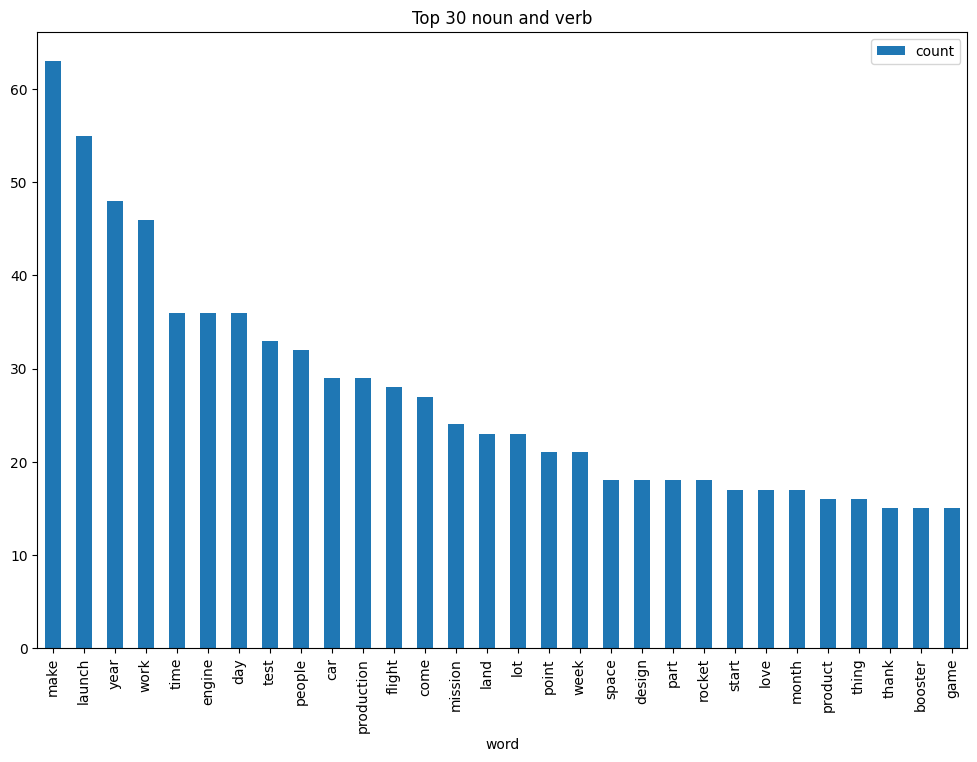

In [ ]:
wd_df[0:30].plot.bar(x='word',figsize=(12,8),title='Top 30 noun and verb')

lets go fo sentiment analysis

In [ ]:
affin=pd.read_csv("/content/sample_data/Afinn.csv",sep=',',encoding='latin-1')
affin.head(10)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [ ]:
affinity_score=affin.set_index('word')['value'].to_dict()
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
elon_sentiment=pd.read_csv("/content/sample_data/Elon_musk.csv", encoding='cp1252',index_col=0)
elon_sentiment.head()

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_score

def calculate_sentiment(text:str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    for word in sentence:
      sent_score+=sentiment_lexicon.get(word.lemma_,0)
  return sent_score


In [ ]:
calculate_sentiment('excellent')

3

In [ ]:
elon_sentiment['sentiment_value']=elon_sentiment['Text'].apply(calculate_sentiment)
elon_sentiment

,Text,sentiment_value
1,@kunalb11 I’m an alien,0
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
3,@joerogan @Spotify Great interview!,3
4,@gtera27 Doge is underestimated,-1
5,@teslacn Congratulations Tesla China for amazi...,4
...,...,...
1995,"@flcnhvy True, it sounds so surreal, but the n...",-3
1996,@PPathole Make sure to read ur terms &amp; con...,1
1997,@TeslaGong @PPathole Samwise Gamgee,0
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,0


In [ ]:
elon_sentiment['word_count']=elon_sentiment['Text'].str.split().apply(len)
elon_sentiment.head()

,Text,sentiment_value,word_count
1,@kunalb11 I’m an alien,0,4
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
3,@joerogan @Spotify Great interview!,3,4
4,@gtera27 Doge is underestimated,-1,4
5,@teslacn Congratulations Tesla China for amazi...,4,17


In [ ]:
elon_sentiment.sort_values(by='sentiment_value')

,Text,sentiment_value,word_count
187,"@naval [Some tyranny]. Also, the road to hell ...",-7,14
1016,@enn_nafnlaus There are sketchy edits to Tesla...,-6,17
1638,@TimothyBuffett @Teslarati Apart from failing ...,-6,17
1718,@Neuro_Skeptic They don’t fire all at once. So...,-6,20
1064,@tesladri @ChananBos @raytech247 @WholeMarsBlo...,-5,21
...,...,...,...
1358,Great trip to Germany. Support from government...,10,12
469,@picot_john @CyberpunkGame It’s a good to grea...,10,20
459,@teslaownerssv It will get absurdly good. Tesl...,10,18
1305,"One way or another, excitement guaranteed! Sup...",11,17


In [ ]:
elon_sentiment.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment_value,1999.0,0.635318,1.725848,-7.0,0.0,0.0,1.0,12.0
word_count,1999.0,10.578789,6.706165,1.0,4.0,9.0,17.0,30.0


In [ ]:
elon_sentiment[elon_sentiment['sentiment_value']<0]

,Text,sentiment_value,word_count
4,@gtera27 Doge is underestimated,-1,4
7,"Frodo was the underdoge,\nAll thought he would...",-2,14
16,"@JoshManMode He definitely has issues, but the...",-2,12
21,@freewalletorg Any crypto wallet that won’t gi...,-1,17
22,@freewalletorg Your app sucks,-3,4
...,...,...,...
1976,@RationalEtienne @flcnhvy @PPathole @IheartTes...,-3,10
1977,@thatt3slaguy @flcnhvy @PPathole @IheartTesla ...,-1,16
1991,"@kenyanwalstreet Not actually a payout, just a...",-1,22
1992,@IheartTesla No easy way to answer this in a t...,-3,23


In [ ]:
elon_sentiment[elon_sentiment['sentiment_value']>0]

,Text,sentiment_value,word_count
3,@joerogan @Spotify Great interview!,3,4
5,@teslacn Congratulations Tesla China for amazi...,4,17
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),2,6
10,The most entertaining outcome is the most likely,2,8
12,Just agree to do Clubhouse with @kanyewest,1,7
...,...,...,...
1988,@PPathole @IheartTesla For sure. This is both ...,3,19
1989,@redmercy Yes,1,2
1990,"@buzzindelhi Sorry, should hopefully be soon!",1,6
1996,@PPathole Make sure to read ur terms &amp; con...,1,12


In [ ]:
elon_sentiment[elon_sentiment['sentiment_value']==0]

,Text,sentiment_value,word_count
1,@kunalb11 I’m an alien,0,4
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,7
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0,11
11,@GiveDirectly Just sent some,0,4
...,...,...,...
1985,@burakaydik True,0,2
1993,AI symbiosis while u wait,0,5
1994,@vistacruiser7 @flcnhvy There’s some of that too,0,7
1997,@TeslaGong @PPathole Samwise Gamgee,0,4


In [ ]:
elon_sentiment['index']=range(0,len(elon_sentiment))
elon_sentiment.head()

,Text,sentiment_value,word_count,index
1,@kunalb11 I’m an alien,0,4,0
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13,1
3,@joerogan @Spotify Great interview!,3,4,2
4,@gtera27 Doge is underestimated,-1,4,3
5,@teslacn Congratulations Tesla China for amazi...,4,17,4


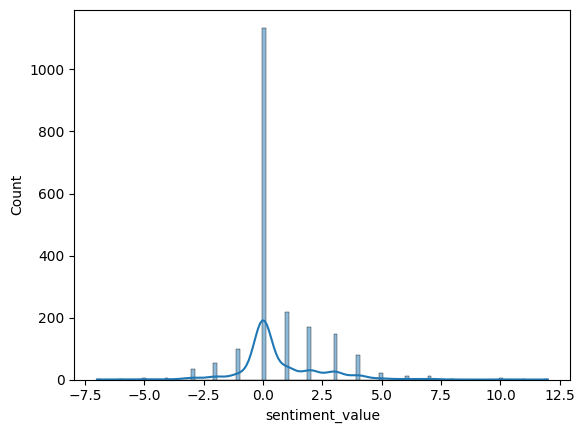

In [ ]:
sns.histplot(elon_sentiment['sentiment_value'],kde=True)
plt.show()

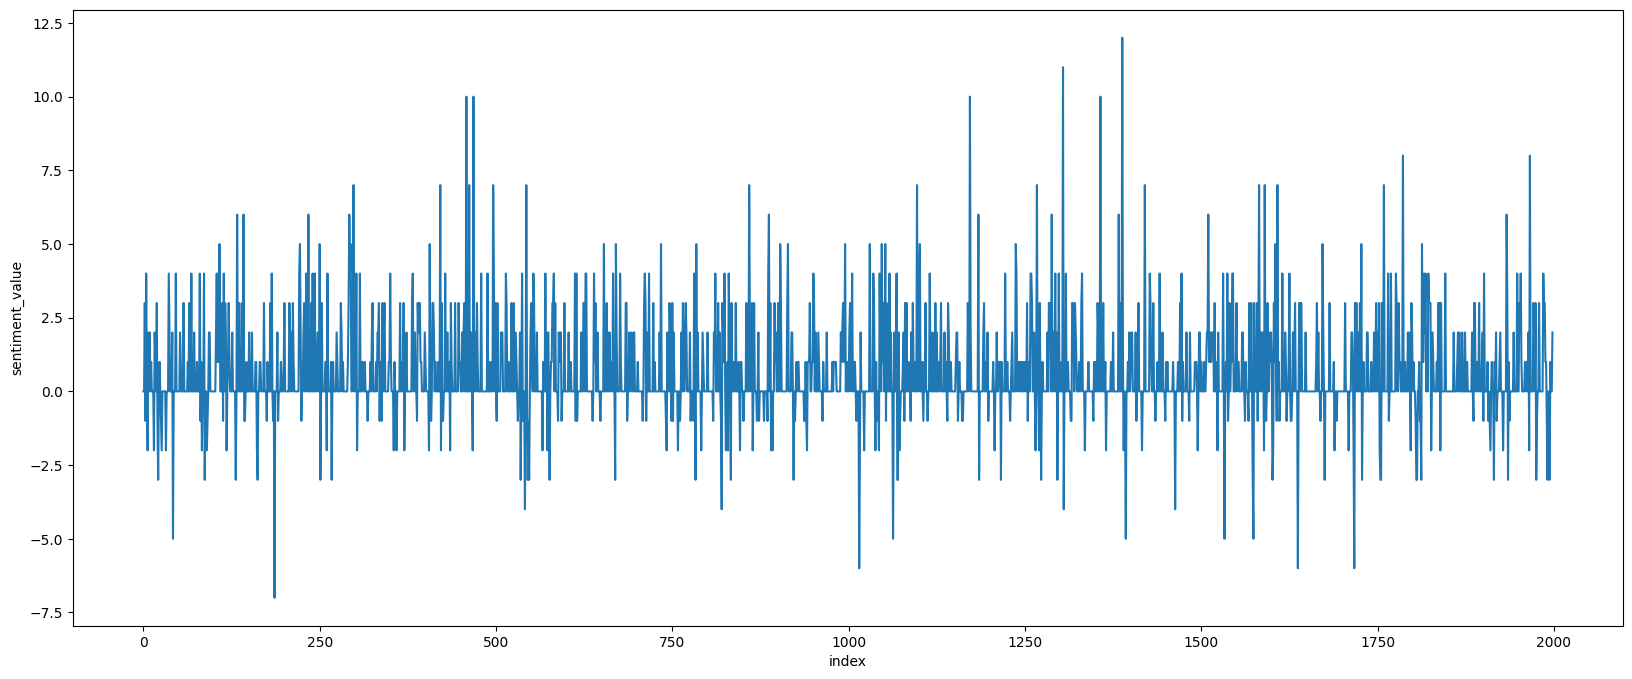

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(y='sentiment_value',x='index',data=elon_sentiment)
plt.show()